In [219]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
import implementations as impl
import cost

In [222]:
error_value = -999.0
seed = 114

## Load the training data into feature matrix, class labels, and event ids:

In [221]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

nb_samples = x.shape[0]
nb_features = x.shape[1]

### Preprocessing

In [179]:
# Cleaned input array by replacing errors with most frequent values
x_clean_mf = pp.clean_data(x, error_value, pp.most_frequent)

# Cleaned input array by replacing errors with mean
x_clean_mean = pp.clean_data(x, error_value, np.mean)

# Cleaned input array by replacing errors with median
x_clean_median = pp.clean_data(x, error_value, np.median)

In [180]:
# Chosen cleaned data
x_clean = x_clean_mf

In [182]:
# Compute tx : column of ones followed by x
first_col = np.ones((nb_samples, 1))
tx = np.concatenate((first_col, x_clean), axis=1)
tx.shape

(250000, 31)

In [194]:
# Normalised version of the data (without the 1's column)
x_normal = pp.normalise(x_clean)
x_normal.shape

(250000, 30)

In [195]:
w_across_impl = {}

In [196]:
# Test for Gradient Descent Least squares.

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-6

# Initialization
w_initial = np.ones((31,))

# Debugger
dbg = debugger.Debugger(['loss', 'w'])

# Start gradient descent.
w, loss = impl.least_squares_GD(y, tx, w_initial, max_iters, gamma, debugger=dbg)

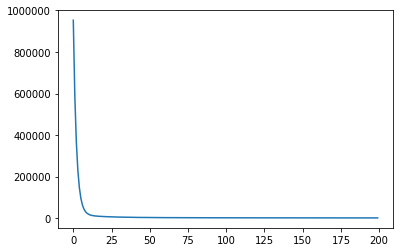

step 200/200:	loss: 922.4014724334551


In [197]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['GD_LS'] = w

In [243]:
# Test for Stochastic Gradient Descent Least squares.

# clear debugger
dbg.clear()

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-6 # loss = 90047

# Initialization
w_initial = np.ones((31,))

# Start gradient descent.
w, loss = impl.least_squares_SGD(y, tx, w_initial, max_iters, gamma, debugger=dbg)

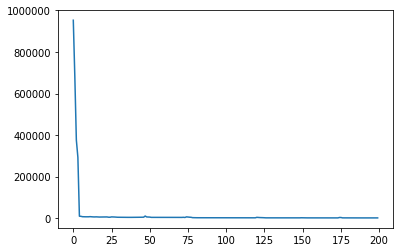

step 200/200:	loss: 943.606705047385


In [246]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['SGD_LS'] = w

In [240]:
# Test for Least squares with normal equations.
w, loss = impl.least_squares(y, tx)

In [241]:
print('loss:', loss[0])
w_across_impl['NE_LS'] = w

loss: 0.3394990055769035


In [202]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 0.2963540937651735
Error between GD_LS and NE_LS is 6.255411437975912
Error between NE_LS and SGD_LS is 6.288052317412405

Norm of w: 5.346268418579422


## Logistic regression test

In [229]:
np.random.seed(seed)

# Random guess (why above .6?)
w = np.random.uniform(0,1,size=nb_features)     
z_ = cost.sigmoid(x_normal @ w)
y_ = misc.get_predictions(z_)

print(misc.accuracy(y, y_))

0.593012


In [256]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-3

# Initialization
nb_features = x_normal.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w'])

w, loss = impl.logistic_regression(y, x_normal, w_initial, max_iters, gamma, debugger=dbg)

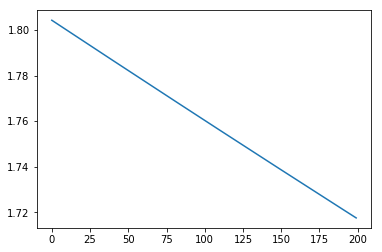

step 200/200:	loss: 1.7175645326288096


In [257]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['LR'] = w

In [260]:
z_ = cost.sigmoid(x_normal @ w)
y_ = misc.get_predictions(z_)

print(misc.accuracy(y, y_))

0.589928


In [261]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-9
lambda_ = 1e-3

# Initialization
nb_features = x_normal.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w'])

w, loss = impl.reg_logistic_regression(y, x_normal, lambda_, w_initial, max_iters, gamma, debugger=dbg)

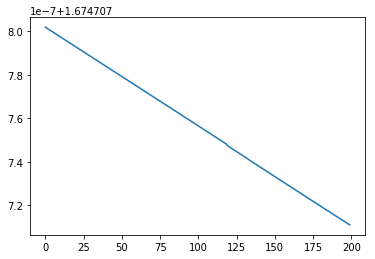

step 200/200:	loss: 1.6747077110247657


In [263]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['RLR'] = w

In [264]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 0.39194042531911905
Error between GD_LS and NE_LS is 6.255411437975912


ValueError: operands could not be broadcast together with shapes (31,) (30,) 